C:\Users\UwU\AppData\Local\Temp\ipykernel_1604\1223687745.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)
C:\Users\UwU\AppData\Local\Temp\ipykernel_1604\1223687745.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Debut'] = df_filtered['Debut'].apply(extract_chapter)
C:\Users\UwU\AppData\Local\Temp\ipykernel_1604\1223687745.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

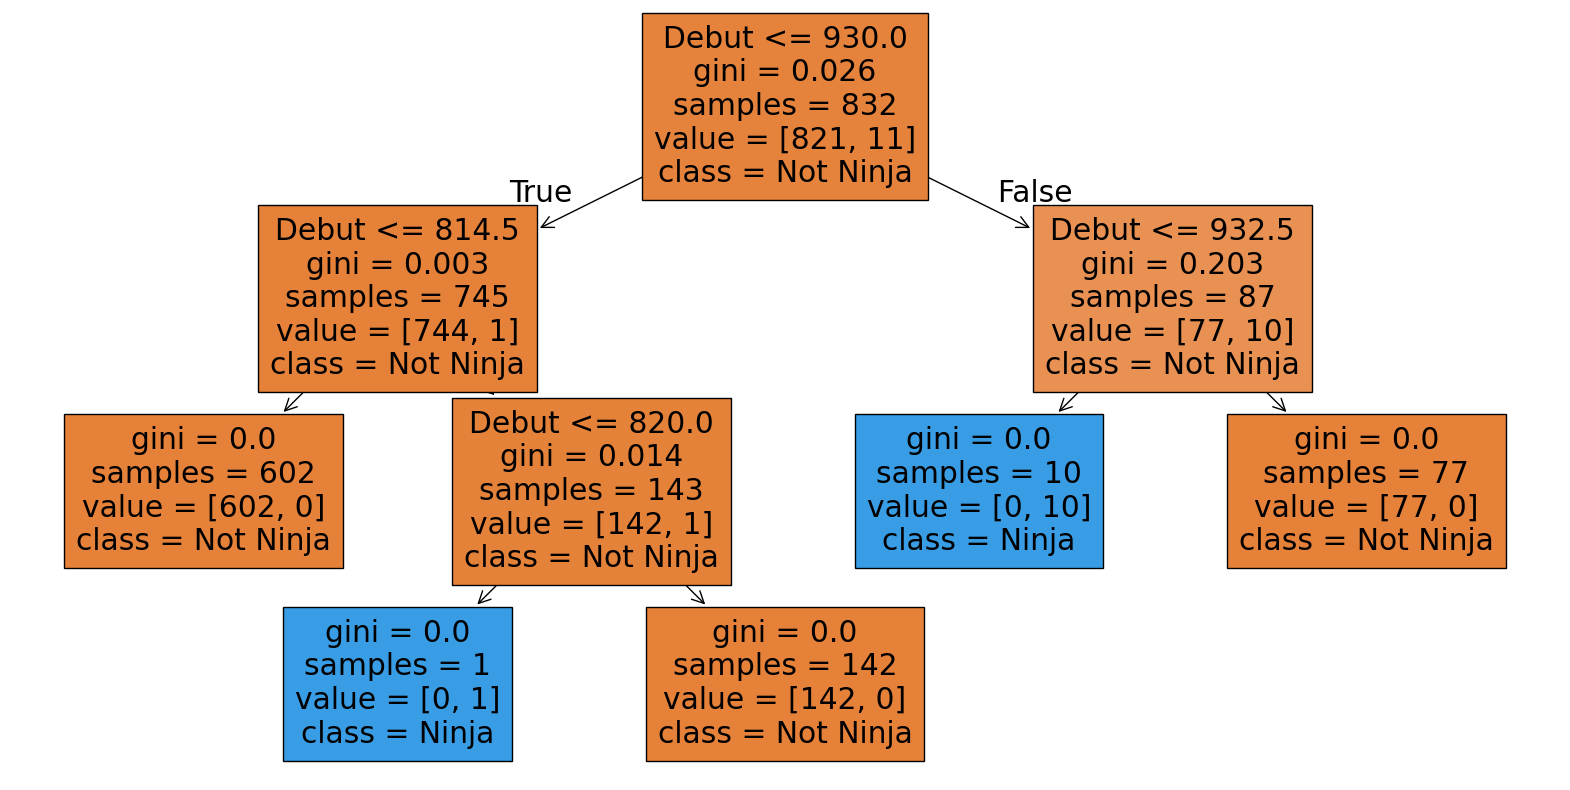

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('onpiece.csv')

# Filtrar las columnas relevantes
df_filtered = df[['Debut', 'Status', 'Affiliations', 'Occupations']]

# Eliminar filas con valores nulos
df_filtered.dropna(inplace=True)

# Función para extraer el capítulo del debut
def extract_chapter(debut):
    match = re.search(r'Chapter (\d+)', str(debut))
    if match:
        return int(match.group(1))
    return None

# Función para extraer la primera ocupación
def extract_first_occupation(occupation):
    return str(occupation).split(';')[0].strip()

df_filtered['Debut'] = df_filtered['Debut'].apply(extract_chapter)
df_filtered['Occupations'] = df_filtered['Occupations'].apply(extract_first_occupation)

# Convertir la columna Status a valores numéricos
df_filtered['Status'] = np.where(df_filtered['Status'] == 'Alive', 1, 0)
    
# Convertir la columna Affiliations a valores numéricos
df_filtered['Affiliations'] = df_filtered['Affiliations'].apply(lambda x: 1 if 'Pirate' in str(x) else 0)

# Convertir la columna Occupations a valores binarios (1 para 'Ninja', 0 para el resto)
df_filtered['Occupations'] = df_filtered['Occupations'].apply(lambda x: 1 if 'Ninja' in x else 0)

# Definir variables X e y
X = df_filtered[['Debut', 'Status', 'Affiliations']]
y = df_filtered['Occupations']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión con profundidad limitada
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Debut', 'Status', 'Affiliations'], class_names=['Not Ninja', 'Ninja'], filled=True)
plt.show()
